<a href="https://colab.research.google.com/github/anhphong22/ML_Implementation/blob/master/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#connect gdrive into google colab
from google.colab import drive
drive.mount('/content/ML')

Drive already mounted at /content/ML; to attempt to forcibly remount, call drive.mount("/content/ML", force_remount=True).


In [2]:
# import prerequisite libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#**1. Data processing**

In [ ]:
"""
data_url = https://www.openintro.org/stat/data/ames.csv
Read data from csv file
Features: Gr.Liv .Area, Bedroom.AbvGr (where Ms.SubClass = 60 & Yr.Sold = 2009)
Ground truth: SalePrice
"""

data_path = '/content/ML/MyDrive/Dataset/ames.csv'
data = pd.read_csv(data_path)
data = data.loc[(data['MS.SubClass']==60) & (data['Yr.Sold'] == 2009), ['Gr.Liv.Area', 'Bedroom.AbvGr', 'SalePrice']]

In [ ]:
"""
Check whether any value in data is null
return {False, True}
"""
data.isnull().values.any()

## Feature scaling
Get every feature into approximately a $-1 \le x_{i} \le 1$ range

In [5]:
df_pre = data.copy()
columns= ['Gr.Liv.Area', 'Bedroom.AbvGr', 'SalePrice']

In [6]:
# Min Max Scaler
scaler = MinMaxScaler()
data_scaling = scaler.fit_transform(data[columns])
df_min_max = pd.DataFrame(data_scaling, columns = columns)

In [7]:
# Standard Scaler
scaler = StandardScaler()
data_scaling = scaler.fit_transform(data[columns])
df_std = pd.DataFrame(data_scaling, columns = columns)

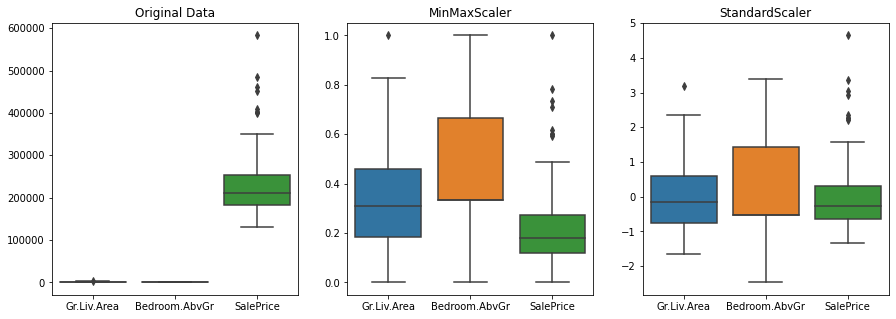

In [8]:
fig, axes = plt.subplots(1, 3, figsize= (15, 5))

# Original Data
sns.boxplot(ax = axes[0], data= df_pre)
axes[0].set_title('Original Data')

# Minmaxscaler
sns.boxplot(ax = axes[1], data= df_min_max)
axes[1].set_title('MinMaxScaler')

# StandardScaler
sns.boxplot(ax = axes[2], data= df_std)
axes[2].set_title('StandardScaler')

plt.show()


From StandardScaler boxplot, the features are now more comparable and will have a similar effect on the learning models.

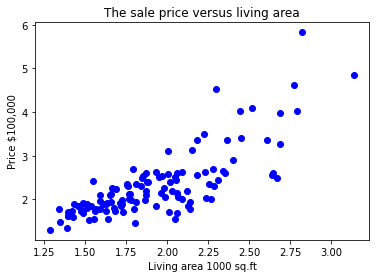

In [9]:
"""
plot the house price versus living area in the form of scattering dots
"""
plt.scatter(data['Gr.Liv.Area']/1000, data['SalePrice']/100000, c = 'b')
plt.xlabel('Living area 1000 sq.ft')
plt.ylabel('Price $100,000')
plt.title('The sale price versus living area')
plt.show()

# **2. Compute weights and loss**

In [10]:
"""
Split the data into 2 parts:
- Training data: 70%
- Testing data: 30%
"""
df_pre = df_std
X_train, X_test, y_train, y_test = train_test_split(df_pre.drop(columns= ['SalePrice']), df_pre.SalePrice, test_size = 0.3, random_state = 42 )

##2.1 Closed form

In [11]:
# add bias for dataset
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]
#y_tr = np.array(y_train)
#y_te = np.array(y_test)

In [12]:
  def closed_form(X, y):
    A = np.dot(X.T, X)
    b = np.dot(X.T, y)
    w = np.dot(np.linalg.pinv(A), b)
    return w

In [13]:
cf = closed_form(X_train_bias, y_train)
w = np.array(cf)

In [14]:
w

array([-0.04107696,  0.81430085, -0.17990706])

##2.2 Gradient Descent

In [15]:
"""
functions: compute loss and gradient
"""

def loss(X, y, w):
  y_p = X.dot(w)
  h = y_p - y
  return 0.5*np.mean(np.dot(h.T, h))

def grad(X, y, w):
  n = X.shape[0]
  y_p = X.dot(w)
  h = y_p - y
  return 1/n * np.dot(X.T, h)

In [16]:
def gradient_descent(w, X_train, X_test, y_train, y_test, lr, epochs):
  log = {"train_loss":[],
         "weights":[],
         "test_loss":[] 
  }
  for i in range(1, epochs + 1):
    # training loss
    train_loss = loss(X_train, y_train, w)
    log["train_loss"].append(train_loss)

    #gradient descent
    dw = grad(X_train, y_train, w)
    w = w - lr* dw
    log["weights"].append(w)

    # testing loss
    test_loss = loss(X_test, y_test, w)
    log["test_loss"].append(test_loss)

    print('--------------------------------')
    print(f'Epoch: {i} / {epochs}')
    print(f'Train_loss: {train_loss}')
    print(f'Test_loss: {test_loss}')
    print(f'Weights: {w.flatten()}')
  
  return log

In [17]:
# initial data
w = np.zeros((X_train_bias.shape[1], 1))
y_tr = np.array([y_train]).T
y_te = np.array([y_test]).T

# compute loss, weights
log = gradient_descent(w, X_train_bias, X_test_bias, y_tr, y_te, lr= 0.1, epochs= 500)

--------------------------------
Epoch: 1 / 500
Train_loss: 37.469418836502165
Test_loss: 19.922976897125903
Weights: [-0.00576074  0.07648297  0.02604934]
--------------------------------
Epoch: 2 / 500
Train_loss: 32.341159980604615
Test_loss: 17.93843140330412
Weights: [-0.01085006  0.14342399  0.04522737]
--------------------------------
Epoch: 3 / 500
Train_loss: 28.522264416135645
Test_loss: 16.41231816294056
Weights: [-0.01534193  0.20221201  0.05876474]
--------------------------------
Epoch: 4 / 500
Train_loss: 25.647855700555038
Test_loss: 15.225789197371157
Weights: [-0.01930227  0.2540212   0.06768916]
--------------------------------
Epoch: 5 / 500
Train_loss: 23.458164622702743
Test_loss: 14.292706384363361
Weights: [-0.02278982  0.29984485  0.07285811]
--------------------------------
Epoch: 6 / 500
Train_loss: 21.76789592065136
Test_loss: 13.550354458755956
Weights: [-0.02585693  0.34052391  0.07498631]
--------------------------------
Epoch: 7 / 500
Train_loss: 20.4445

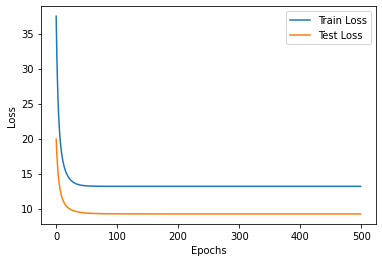

In [18]:
plt.plot(log['train_loss'], label='Train Loss')
plt.plot(log['test_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##2.3 Sklearn_Linear Model

In [19]:
from sklearn import datasets, linear_model
# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(X_train_bias, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [20]:
regr.coef_

array([-0.04107696,  0.81430085, -0.17990706])